In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_feather('dataset/train.feather')

In [3]:
time_group  =train.groupby('time_id')
investment_group  =train.groupby('investment_id')

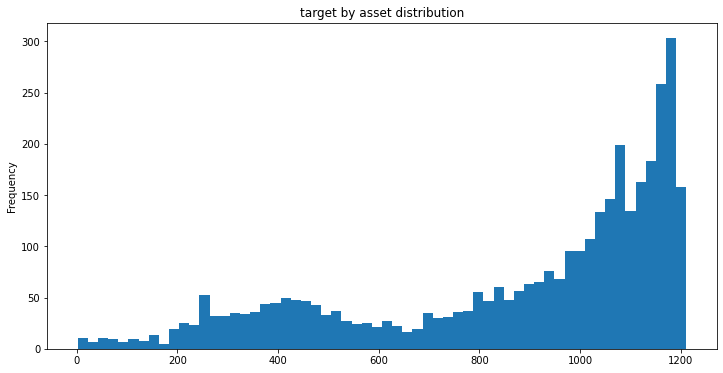

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
obs_by_asset = investment_group.investment_id.count()
obs_by_asset.plot.hist(bins=60)
plt.title('target by asset distribution')
plt.show()

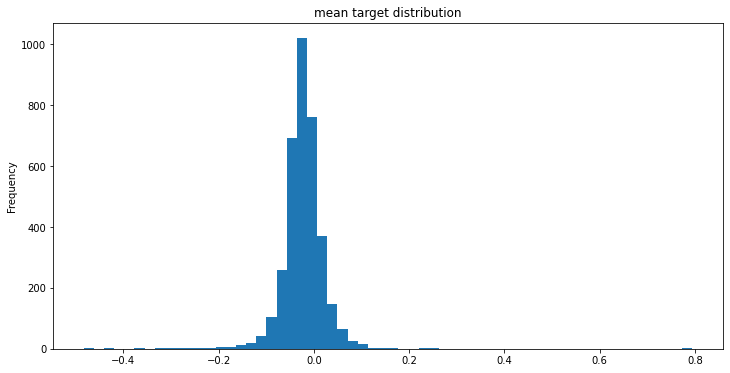

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
mean_target = investment_group.target.mean()
mean_target.plot.hist(bins=60)
plt.title('mean target distribution')
plt.show()

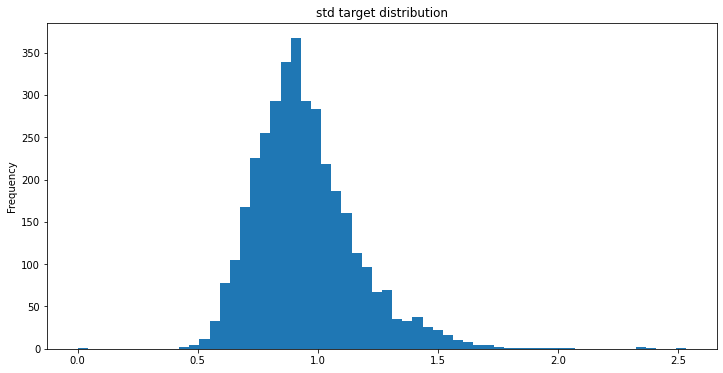

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sts_target = investment_group.target.std()
sts_target.plot.hist(bins=60)
plt.title('std target distribution')
plt.show()

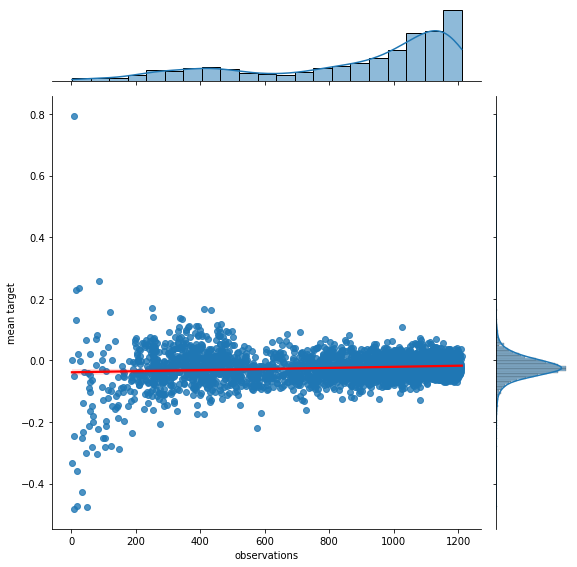

In [7]:
ax = sns.jointplot(y=mean_target, x=obs_by_asset, height=8, kind='reg', joint_kws={'line_kws': {'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('mean target')
plt.show()

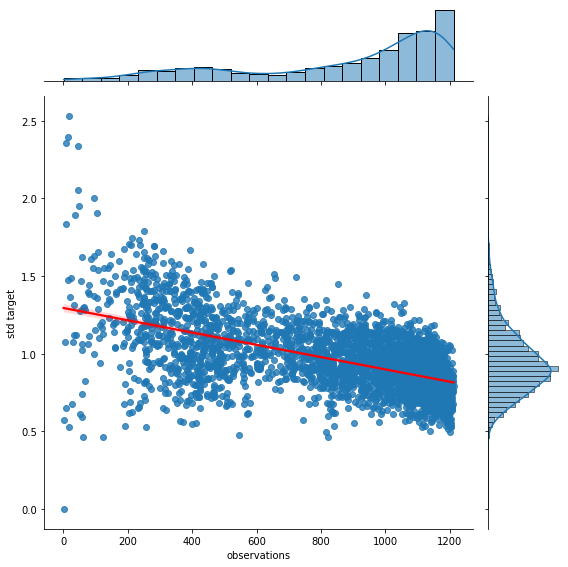

In [8]:
ax = sns.jointplot(y=sts_target, x=obs_by_asset, height=8, kind='reg', joint_kws={'line_kws': {'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('std target')
plt.show()

**Strategy**: in training you need to control this effect by expliciting the number of observations because this is predictive of the uncertainty of the predictions. In the test phase, instead, when you are working with an asset that you don't know about, you need to impute an average number of observations, thus expecting an average dispersion of predictions for that asset.

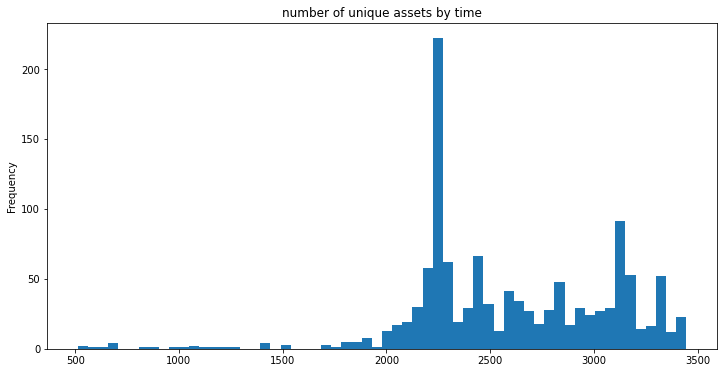

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
time_group.investment_id.nunique().plot.hist(bins=60)
plt.title('number of unique assets by time')
plt.show()

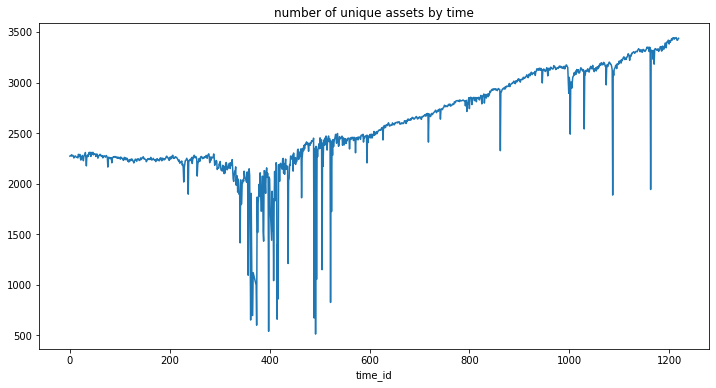

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
time_group.investment_id.nunique().plot()
plt.title('number of unique assets by time')
plt.show()

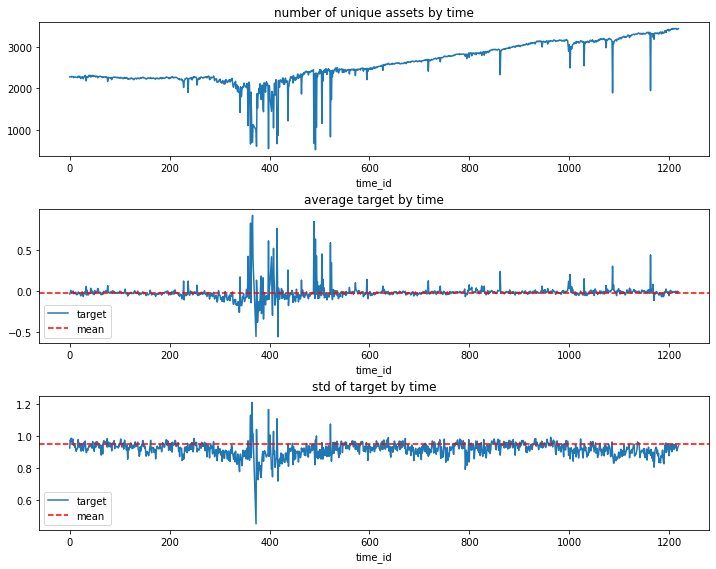

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1,)
time_group.investment_id.nunique().plot()
plt.title("number of unique assets by time")

plt.subplot(3, 1, 2)
time_group.target.mean().plot()
plt.title("average target by time")
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplot(3, 1, 3)
time_group.target.std().plot()
plt.title("std of target by time")
plt.axhline(y=sts_target.mean(), color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplots_adjust(right=0.9, top=1.3, wspace=0.4, hspace=0.4)

plt.show()


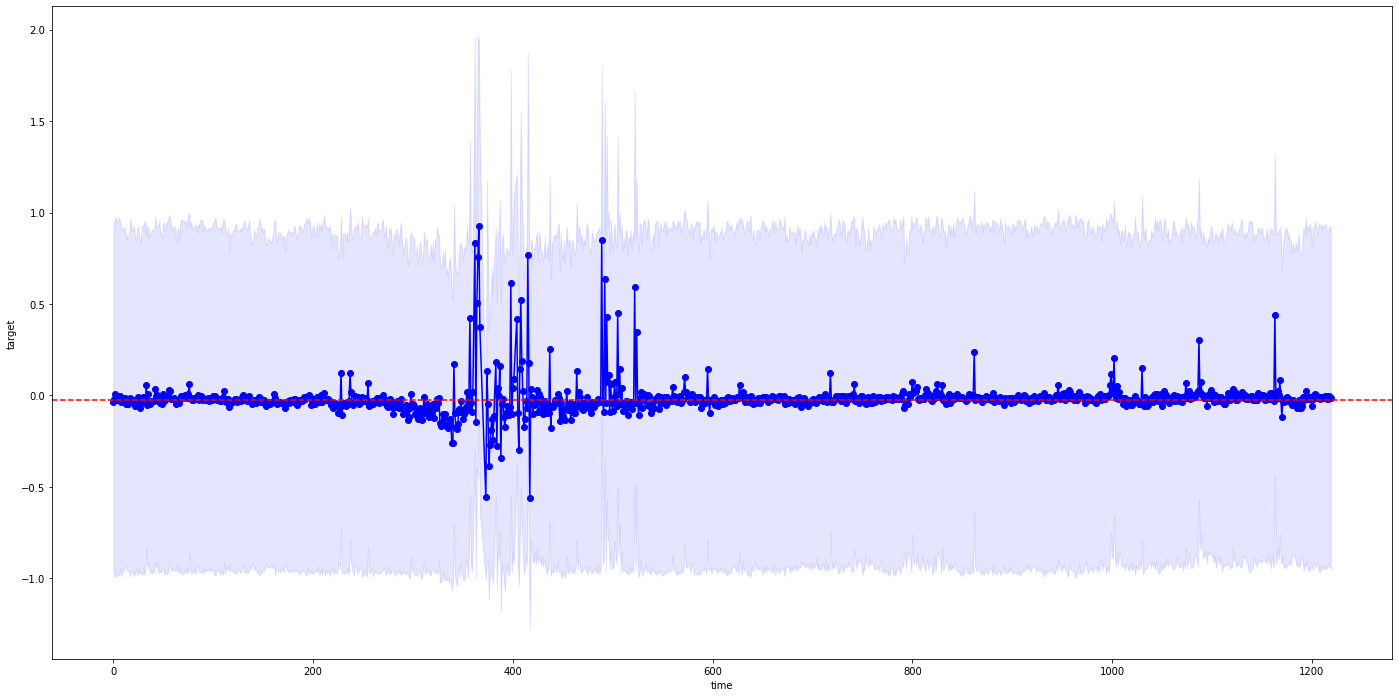

In [12]:
time2target_mean = time_group.target.mean()
time2target_std = time_group.target.std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean")
axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

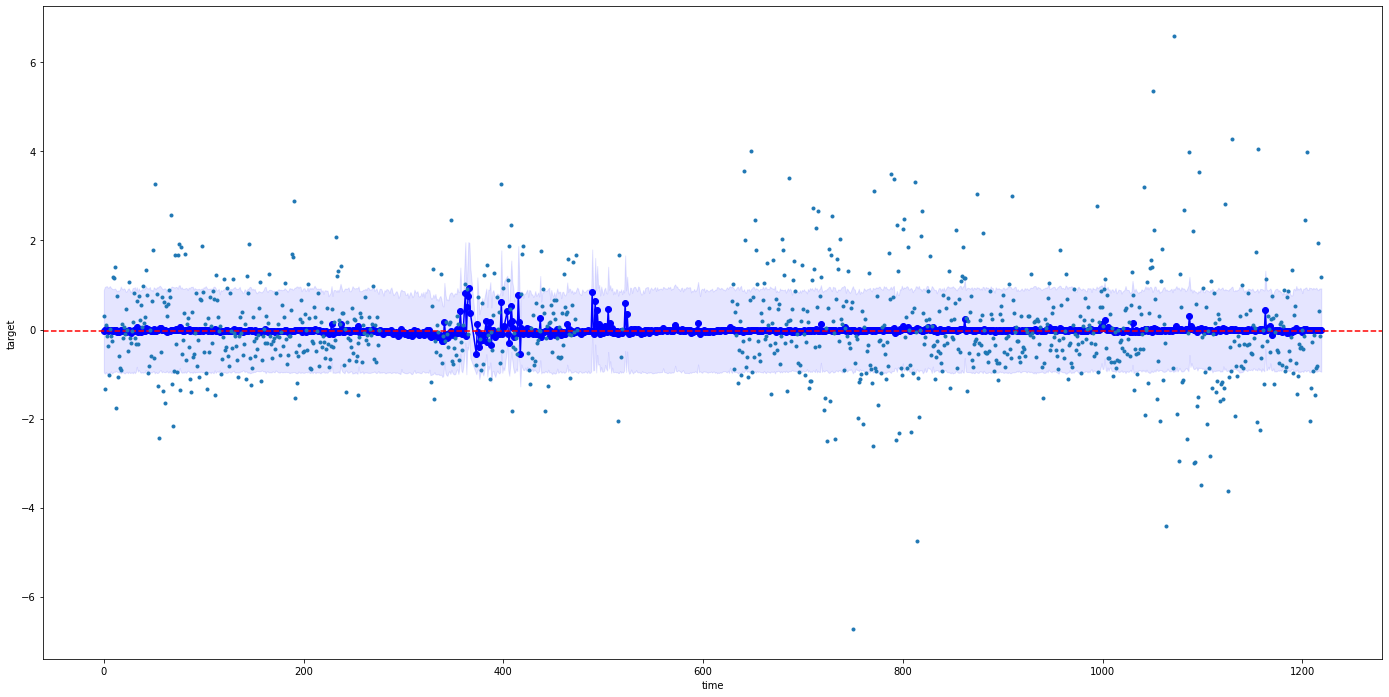

In [18]:
time2target_mean = time_group.target.mean()
time2target_std = time_group.target.std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_target.mean(), color='r', linestyle='--', label="mean")

asset = 80
plt.plot(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, '.')

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

**Strategy**: now your cv strategy should be clear, you have to do groupkfold on the time_id, keeping all the assets realtive to a time_id or in train or in validation.

In [14]:
obs_by_asset = investment_group.target.count().to_dict()
target = train.investment_id.copy().replace(obs_by_asset).astype(np.int16)
features = train.columns[4:]

del(obs_by_asset)

In [15]:
corrs = list()
for col in features:
    corr = np.corrcoef(target, train[col])[0][1]
    corrs.append(corr)
    
del(target)

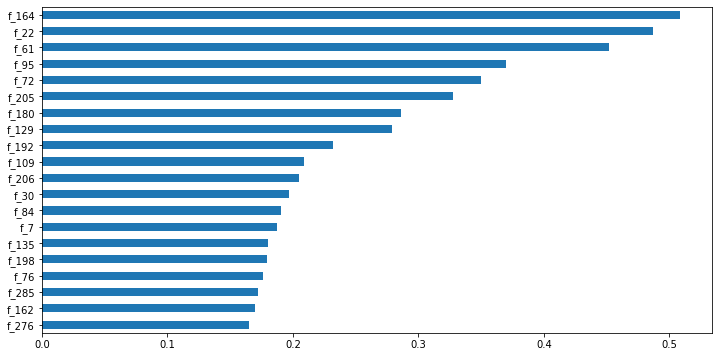

In [16]:
feat_importances = pd.Series(corrs, index=features)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12, 6)).invert_yaxis()
plt.show()

In [17]:
train.columns

Index(['row_id', 'time_id', 'investment_id', 'target', 'f_0', 'f_1', 'f_2',
       'f_3', 'f_4', 'f_5',
       ...
       'f_290', 'f_291', 'f_292', 'f_293', 'f_294', 'f_295', 'f_296', 'f_297',
       'f_298', 'f_299'],
      dtype='object', length=304)